In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [1]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 999

In [4]:
train_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)

In [5]:
test_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"\
                       , skiprows = 1, header = None)

In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',\
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',\
'native_country', 'wage_class']

In [7]:
train_set.columns = col_labels
test_set.columns = col_labels

In [8]:
train_set.shape, test_set.shape

((32561, 15), (16281, 15))

In [9]:
train_set.workclass = train_set.workclass.str.strip()
train_set.education = train_set.education.str.strip()
train_set.marital_status = train_set.marital_status.str.strip()
train_set.occupation = train_set.occupation.str.strip()
train_set.relationship = train_set.relationship.str.strip()
train_set.race = train_set.race.str.strip()
train_set.sex = train_set.sex.str.strip()
train_set.native_country = train_set.native_country.str.strip()
train_set.wage_class = train_set.wage_class.str.strip()

test_set.workclass = test_set.workclass.str.strip()
test_set.education = test_set.education.str.strip()
test_set.marital_status = test_set.marital_status.str.strip()
test_set.occupation = test_set.occupation.str.strip()
test_set.relationship = test_set.relationship.str.strip()
test_set.race = test_set.race.str.strip()
test_set.sex = test_set.sex.str.strip()
test_set.native_country = test_set.native_country.str.strip()
test_set.wage_class = test_set.wage_class.str.strip()

In [10]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [11]:
train_set.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [12]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [13]:
train_set.wage_class.value_counts()

<=50K    24720
>50K      7841
Name: wage_class, dtype: int64

In [14]:
train_set['income'] = train_set.wage_class.map({'<=50K':0, '>50K': 1})
test_set['income'] = test_set.wage_class.map({'<=50K.':0, '>50K.': 1})

In [15]:
train_set.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [16]:
test_set.income.value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [17]:
train_set = train_set.drop(['wage_class'], 1)
test_set = test_set.drop(['wage_class'], 1)

In [18]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [19]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int64
dtype: object

In [20]:
train_colsnum = train_set.dtypes[train_set.dtypes != 'object'].index
train_colsnum

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income'],
      dtype='object')

In [21]:
train_colsstr = train_set.dtypes[train_set.dtypes == 'object'].index
train_colsstr

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [22]:
test_colsnum = test_set.dtypes[test_set.dtypes != 'object'].index
test_colsnum

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income'],
      dtype='object')

In [23]:
test_colsstr = test_set.dtypes[train_set.dtypes == 'object'].index
test_colsstr

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [24]:
for cols in train_colsstr:
    train_set = train_set.join(pd.get_dummies(train_set[cols], prefix=cols, drop_first=True))

In [25]:
for cols in test_colsstr:
    test_set = test_set.join(pd.get_dummies(test_set[cols], prefix=cols, drop_first=True))

In [26]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=109)

In [27]:
train_set.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
train_set_new = train_set.drop(train_colsstr, axis=1)
test_set_new = test_set.drop(test_colsstr, axis=1)

In [29]:
train_set_new.shape, test_set_new.shape

((32561, 101), (16281, 100))

In [30]:
# Get missing columns in the training test
missing_cols = set( train_set_new.columns ) - set( test_set_new.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_set_new[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_set_new = test_set_new[train_set_new.columns]

In [31]:
test_set_new['native_country_Holand-Netherlands'].unique()

array([0], dtype=int64)

In [32]:
train_set_new.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
x_train = train_set_new.drop('income', axis=1)
y_train = train_set_new['income']
x_test = test_set_new.drop('income', axis=1)
y_test = test_set_new['income']

In [34]:
test_set_new.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=101)

In [35]:
train_set_new.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=101)

In [36]:
rfc = RandomForestClassifier(n_estimators=150)

In [37]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance':rfc.feature_importances_})

In [39]:
importance = importance.sort_values(by='importance', ascending=False)

In [40]:
importance

,cols,importance
1,fnlwgt,0.164587
0,age,0.151666
3,capital_gain,0.100864
30,marital_status_Married-civ-spouse,0.086596
5,hours_per_week,0.085375
2,education_num,0.066785
4,capital_loss,0.031441
32,marital_status_Never-married,0.030592
38,occupation_Exec-managerial,0.018815
49,relationship_Not-in-family,0.017107


In [41]:
import seaborn as sns

In [42]:
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

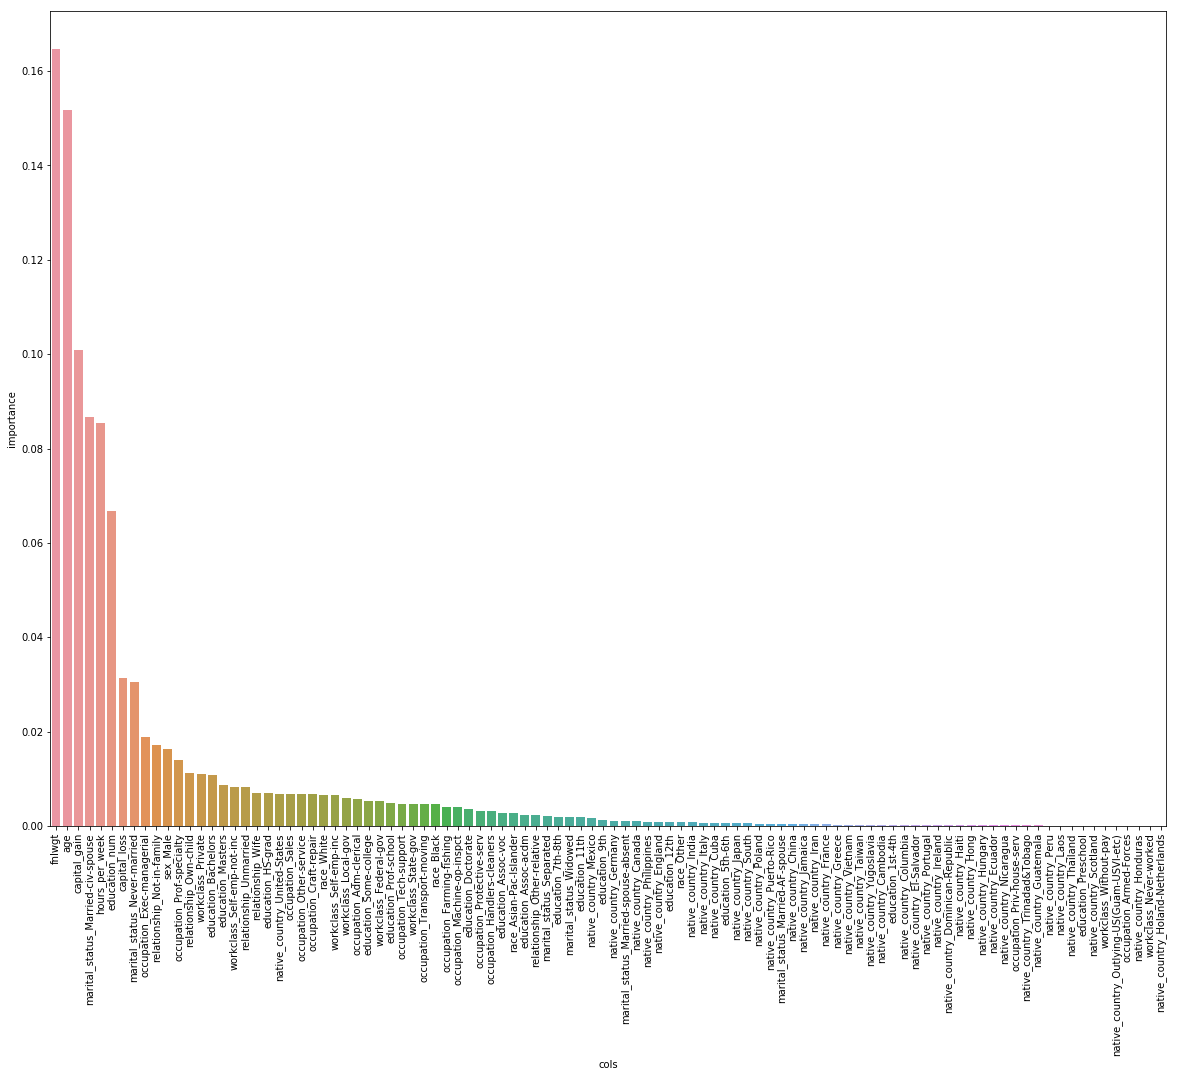

In [43]:
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [44]:
train_set_new.groupby('income').age.describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
0,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
1,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


In [45]:
imp_cols = importance[importance.importance > 0.01].cols.values
imp_cols

array(['fnlwgt', 'age', 'capital_gain',
       'marital_status_Married-civ-spouse', 'hours_per_week',
       'education_num', 'capital_loss', 'marital_status_Never-married',
       'occupation_Exec-managerial', 'relationship_Not-in-family',
       'sex_Male', 'occupation_Prof-specialty', 'relationship_Own-child',
       'workclass_Private', 'education_Bachelors'], dtype=object)

In [46]:
names = ['Decision Tree', 'Random Forest Classifier', 'AdaBoost', 'Logistic', 'GBM']

In [47]:
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=250, max_depth=12),
    AdaBoostClassifier(n_estimators=250),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=250)
]

In [48]:
list(zip(names, classifiers))

[('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('Random Forest Classifier',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=12, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('AdaBoost', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=250, random_state=None)),
 ('Log

In [49]:
for clf in zip(names, classifiers):
    clf[1].fit(x_train, y_train)
    pred_train = clf[1].predict(x_train)
    pred_test = clf[1].predict(x_test)
    print(clf[0], metrics.accuracy_score(pred_train, y_train), metrics.precision_score(pred_train, y_train))
    print(clf[0], metrics.accuracy_score(pred_test, y_test), metrics.precision_score(pred_test, y_test))

Decision Tree 0.8520929946868954 0.5337329422267568
Decision Tree 0.8519746944290891 0.5208008320332813
Random Forest Classifier 0.8705813703510334 0.582323683203673
Random Forest Classifier 0.8604508322584608 0.5527821112844514
AdaBoost 0.8710113325757809 0.6451983165412575
AdaBoost 0.8683127572016461 0.640145605824233


C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic 0.7979484659562053 0.2629766611401607
Logistic 0.7997665991032492 0.25975039001560063
GBM 0.8784435367464144 0.6547634230327765
GBM 0.8748848350838401 0.6448257930317213


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
for clf in zip(names, classifiers):
    print(clf[0])
    pred_test = clf[1].predict(x_test)
    print(confusion_matrix(pred_test, y_test))
    print(classification_report(pred_test, y_test))
    print(':'*20)

Decision Tree
[[11868  1843]
 [  567  2003]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     13711
           1       0.52      0.78      0.62      2570

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.74      0.82      0.77     16281
weighted avg       0.89      0.85      0.86     16281

::::::::::::::::::::
Random Forest Classifier
[[11883  1720]
 [  552  2126]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     13603
           1       0.55      0.79      0.65      2678

   micro avg       0.86      0.86      0.86     16281
   macro avg       0.75      0.83      0.78     16281
weighted avg       0.89      0.86      0.87     16281

::::::::::::::::::::
AdaBoost
[[11675  1384]
 [  760  2462]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92     13059
           1       0.64      0.76      0.70      3222


In [57]:
for clf in zip(names, classifiers):
    print(clf[0])
    print("  cross_val_score on train data:")
    print(      cross_val_score(clf[1], x_train, y_train, cv=5))
    print("  cross_val_score on test data:")
    print(      cross_val_score(clf[1], x_test, y_test, cv=5))
#     pred_test = clf[1].predict(x_test)
#     print(confusion_matrix(pred_test, y_test))
#     print(classification_report(pred_test, y_test))
    print('*'*20)

Decision Tree
  cross_val_score on train data:
[0.84170121 0.84367322 0.84505528 0.85365479 0.85503686]
  cross_val_score on test data:
[0.84863371 0.84889435 0.85012285 0.85780098 0.85687961]
********************
Random Forest Classifier
  cross_val_score on train data:
[0.85352372 0.85749386 0.86087224 0.86317568 0.86286855]
  cross_val_score on test data:
[0.85600246 0.86271499 0.85687961 0.86210074 0.86701474]
********************
AdaBoost
  cross_val_score on train data:
[0.86688162 0.86210074 0.87070025 0.87361794 0.87162162]
  cross_val_score on test data:
[0.86459932 0.872543   0.85872236 0.86670762 0.87223587]
********************
Logistic
  cross_val_score on train data:


C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

[0.7968678  0.79407248 0.80006143 0.79560811 0.7997543 ]
  cross_val_score on test data:


C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

[0.80411422 0.79791155 0.79361179 0.79944717 0.79914005]
********************
GBM
  cross_val_score on train data:
[0.86764932 0.8671683  0.87085381 0.87546069 0.8737715 ]
  cross_val_score on test data:
[0.86459932 0.87438575 0.86394349 0.8713145  0.87438575]
********************


<span style="color:black; font-size:1.1em;">**Problem 1:
Prediction task is to determine whether a person makes over 50K a year.**</span>

- We tried here 5 different models with the n_estimators value = 250.
- We are able to get the **85 %** score for 4 of them.
- Also their cross val score are consistent for 5 different folds.
- Thus our models are predicting 85 % accuracy.

<span style="color:black; font-size:1.1em;">**Problem 2:
Which factors are important.**</span>

- As you can see above the output of **feature_importances_** and its **barplot**,
- below are the important features along with their importances:
- **fnlwgt**			0.164587
- **age**				0.151666
- **capital_gain**	0.100864
- **marital_status_Married-civ-spouse**	0.086596
- **hours_per_week**	0.085375
- **education_num**	0.066785
- **capital_loss**	0.031441
- **marital_status_Never-married**	0.030592

<span style="color:black; font-size:1.1em;">**Problem 3:
Which algorithms are best for this dataset**</span>

- We tried 5 different algorithms on this data set.
- Their predicted score is around **85 %**.
- The precision, recall, decision tree value are consistent for the models as per their score.
- Thus all models are performing well while the score is little low for Logistic regression. 

<span style="color:blue; font-size:1.3em;">**Lets try Random forest classifier on Random search CV and Grid Search CV**</span>

<span style="color:blue; font-size:1.3em;">**Calculating KS statistics**</span>

<span style="color:blue; font-size:1.3em;">**Building ROC AUC Curve**</span>

## Random Search CV

In [61]:
print(classifiers[1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [63]:
param_dist = {"max_depth":[5, None],
              "n_estimators":sp_randint(50,150),
              "min_samples_split":sp_randint(2,6),
              "min_samples_leaf":sp_randint(1,6),
              "bootstrap":[True,False],
              "criterion":["gini","entropy"]
             }

In [64]:
rscv = RandomizedSearchCV(classifiers[1], param_distributions=param_dist, n_iter=10, verbose=1, scoring='precision', cv=5)

In [65]:
rscv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [5, None], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001365BCCB0F0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001365BCCB630>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001365BCCB358>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs

In [67]:
rscv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 60}

In [68]:
pred_test = rscv.predict(x_test)
pred_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [69]:
rscv.score(x_test, y_test)

0.8505214368482039

In [70]:
metrics.precision_score(pred_test, y_test)

0.38169526781071245

In [73]:
rscv.fit(x_train[imp_cols], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [5, None], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001365BCCB0F0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001365BCCB630>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001365BCCB358>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs

In [74]:
rscv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 70}

In [75]:
pred_test = rscv.predict(x_test[imp_cols])
pred_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [76]:
rscv.score(x_test[imp_cols], y_test)

0.7681498829039812

In [77]:
metrics.precision_score(pred_test, y_test)

0.5117004680187207

## Grid Search CV

In [78]:
param_dist = {"max_depth":[5,None],
              "n_estimators":[50,100,150],
              "min_samples_split":[2,3,4,5],
              "min_samples_leaf":[2,3,4,5,6]             
             }

In [79]:
rscv_grid = GridSearchCV(classifiers[1], param_grid=param_dist, verbose=1, n_jobs=10)

In [80]:
rscv_grid.fit(x_train, y_train)

C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   47.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  4.1min
[Parallel(n_jobs=10)]: Done 360 out of 360 | elapsed: 12.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'max_depth': [5, None], 'n_estimators': [50, 100, 150], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [81]:
rscv_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [82]:
model = rscv_grid.best_estimator_
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
model.score(x_train, y_train)

0.9067289088172967

In [84]:
rscv_grid.fit(x_train[imp_cols], y_train)

C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   50.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 360 out of 360 | elapsed:  7.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'max_depth': [5, None], 'n_estimators': [50, 100, 150], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [85]:
rscv_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 50}

In [86]:
pred_test = rscv.predict(x_test[imp_cols])
pred_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [87]:
rscv.score(x_test[imp_cols], y_test)

0.7681498829039812

In [88]:
metrics.precision_score(pred_test, y_test)

0.5117004680187207

In [89]:
model = rscv_grid.best_estimator_
model.fit(x_train[imp_cols], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
model.score(x_test[imp_cols],y_test)

0.8641975308641975

# KS Statistics

In [91]:
predict_prob = rscv.predict_proba(x_test[imp_cols])
pred_test = rscv.predict(x_test[imp_cols])

In [92]:
predict_prob, pred_test

(array([[0.99191217, 0.00808783],
        [0.66310001, 0.33689999],
        [0.75046262, 0.24953738],
        ...,
        [0.37525966, 0.62474034],
        [0.68619427, 0.31380573],
        [0.35564412, 0.64435588]]),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64))

In [93]:
new_df = pd.DataFrame.from_dict({'target': y_test, 'predict':pred_test, 'pred_prob_0':predict_prob[:,0], \
                                 'pred_prob_1':predict_prob[:,1]})

In [94]:
new_df = new_df.sort_values(by='pred_prob_1', ascending=False)

In [95]:
new_df.head()

,target,predict,pred_prob_0,pred_prob_1
14662,1,1,0.077502,0.922498
11588,1,1,0.085798,0.914202
8215,1,1,0.085798,0.914202
5417,1,1,0.086236,0.913764
8740,1,1,0.086368,0.913632


In [96]:
splits = []
range_space = np.linspace(1,0,11)
for i in range(1, len(range_space)):
    print(range_space[i-1], range_space[i])
    print(new_df.loc[(new_df.pred_prob_1 <= range_space[i-1]) & (new_df.pred_prob_1 > range_space[i]) ])
splits = np.array_split(new_df.values, 10)

1.0 0.9
       target  predict  pred_prob_0  pred_prob_1
14662       1        1     0.077502     0.922498
11588       1        1     0.085798     0.914202
8215        1        1     0.085798     0.914202
5417        1        1     0.086236     0.913764
8740        1        1     0.086368     0.913632
14801       1        1     0.086516     0.913484
6585        1        1     0.088989     0.911011
4637        1        1     0.088989     0.911011
4480        1        1     0.090455     0.909545
9496        1        1     0.090655     0.909345
10104       1        1     0.093536     0.906464
6311        1        1     0.093649     0.906351
12279       1        1     0.093751     0.906249
11146       1        1     0.094054     0.905946
5239        1        1     0.094059     0.905941
1557        1        1     0.094059     0.905941
13440       1        1     0.094059     0.905941
15689       1        1     0.094121     0.905879
9339        1        1     0.094145     0.905855
7387        

In [97]:
splits

[array([[1.        , 1.        , 0.07750241, 0.92249759],
        [1.        , 1.        , 0.08579845, 0.91420155],
        [1.        , 1.        , 0.08579845, 0.91420155],
        ...,
        [1.        , 1.        , 0.3947236 , 0.6052764 ],
        [0.        , 1.        , 0.3947236 , 0.6052764 ],
        [1.        , 1.        , 0.3949014 , 0.6050986 ]]),
 array([[0.        , 1.        , 0.39508658, 0.60491342],
        [0.        , 1.        , 0.39508658, 0.60491342],
        [1.        , 1.        , 0.39508658, 0.60491342],
        ...,
        [0.        , 0.        , 0.63412412, 0.36587588],
        [1.        , 0.        , 0.63423839, 0.36576161],
        [1.        , 0.        , 0.63423839, 0.36576161]]),
 array([[1.        , 0.        , 0.63423839, 0.36576161],
        [1.        , 0.        , 0.63423839, 0.36576161],
        [1.        , 0.        , 0.63423839, 0.36576161],
        ...,
        [0.        , 0.        , 0.7022326 , 0.2977674 ],
        [0.        , 0.      

In [98]:
splits[-1]

array([[0.        , 0.        , 0.98300882, 0.01699118],
       [0.        , 0.        , 0.98300882, 0.01699118],
       [0.        , 0.        , 0.98300882, 0.01699118],
       ...,
       [0.        , 0.        , 0.99265434, 0.00734566],
       [0.        , 0.        , 0.99265434, 0.00734566],
       [0.        , 0.        , 0.99265434, 0.00734566]])

In [99]:
ks_df = pd.DataFrame(columns=['count', '1s', '0s', 'pos_per', 'neg_per'])
ks_df

,count,1s,0s,pos_per,neg_per


In [100]:
list_of_dict = []
for sp in splits:
    cnt = sp.shape[0]
    pred_target_pos = sp[:,3].sum()
    pred_target_neg = cnt - pred_target_pos
    pos_per = pred_target_pos / cnt
    neg_per = pred_target_neg / cnt
    list_of_dict.append({'count':cnt, '1s':pred_target_pos, '0s': pred_target_neg, 'pos_per':pos_per, 'neg_per':neg_per})

In [101]:
metric_data = pd.DataFrame.from_dict(list_of_dict)
metric_data

,0s,1s,count,neg_per,pos_per
0,466.026670,1162.973330,1629,0.286081,0.713919
1,812.442878,815.557122,1628,0.499044,0.500956
2,1098.467032,529.532968,1628,0.674734,0.325266
3,1153.561609,474.438391,1628,0.708576,0.291424
4,1226.808749,401.191251,1628,0.753568,0.246432
5,1410.440494,217.559506,1628,0.866364,0.133636
6,1502.814504,125.185496,1628,0.923105,0.076895
7,1540.217429,87.782571,1628,0.946080,0.053920
8,1581.286120,46.713880,1628,0.971306,0.028694
9,1613.475194,14.524806,1628,0.991078,0.008922


In [102]:
metric_data['0s_cumsum'] = metric_data['0s'].cumsum()
metric_data['1s_cumsum'] = metric_data['1s'].cumsum()
metric_data['0s_cumsum_per'] = metric_data['0s_cumsum'] / metric_data['0s'].sum()
metric_data['1s_cumsum_per'] = metric_data['1s_cumsum'] / metric_data['1s'].sum()
metric_data['cum_pop_%'] = (metric_data.index + 1) * 10

metric_data['lift_decile'] = 1000 * metric_data['1s'] / metric_data['1s'].sum()
metric_data['lift_total'] = 1000 * metric_data['1s_cumsum_per'] / metric_data['cum_pop_%']
metric_data['ks'] = metric_data['1s_cumsum_per'] - metric_data['0s_cumsum_per']
metric_data

,0s,1s,count,neg_per,pos_per,0s_cumsum,1s_cumsum,0s_cumsum_per,1s_cumsum_per,cum_pop_%,lift_decile,lift_total,ks
0,466.026670,1162.973330,1629,0.286081,0.713919,466.026670,1162.973330,0.037566,0.300087,10,300.086579,30.008658,0.262521
1,812.442878,815.557122,1628,0.499044,0.500956,1278.469549,1978.530451,0.103056,0.510528,20,210.441409,25.526399,0.407472
2,1098.467032,529.532968,1628,0.674734,0.325266,2376.936580,2508.063420,0.191603,0.647165,30,136.637473,21.572182,0.455563
3,1153.561609,474.438391,1628,0.708576,0.291424,3530.498189,2982.501811,0.284590,0.769587,40,122.421203,19.239667,0.484996
4,1226.808749,401.191251,1628,0.753568,0.246432,4757.306938,3383.693062,0.383482,0.873108,50,103.520955,17.462152,0.489625
5,1410.440494,217.559506,1628,0.866364,0.133636,6167.747432,3601.252568,0.497177,0.929245,60,56.137734,15.487423,0.432069
6,1502.814504,125.185496,1628,0.923105,0.076895,7670.561936,3726.438064,0.618317,0.961547,70,32.302106,13.736392,0.343230
7,1540.217429,87.782571,1628,0.946080,0.053920,9210.779365,3814.220635,0.742473,0.984198,80,22.650882,12.302479,0.241725
8,1581.286120,46.713880,1628,0.971306,0.028694,10792.065485,3860.934515,0.869939,0.996252,90,12.053766,11.069468,0.126313
9,1613.475194,14.524806,1628,0.991078,0.008922,12405.540679,3875.459321,1.000000,1.000000,100,3.747893,10.000000,0.000000


Text(0, 0.5, 'ks')

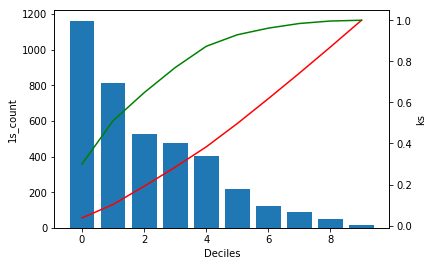

In [103]:
fig1, ax1 = plt.subplots()

ax1.bar(metric_data.index, metric_data['1s'])
ax1.set_ylabel('1s_count')
ax1.set_xlabel('Deciles')
ax2=ax1.twinx()

ax2.plot(metric_data['0s_cumsum_per'], color='red')
ax2.plot(metric_data['1s_cumsum_per'], color='green')
ax2.set_ylabel('ks')

# ROC AUC Curve


In [104]:
predict_prob = rscv.predict_proba(x_test[imp_cols])
pred_test = rscv.predict(x_test[imp_cols])

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_prob[:,1])
roc_df = pd.DataFrame.from_dict({'fpr':fpr, 'tpr': tpr, 'thresholds':thresholds})
roc_df.head()

,fpr,tpr,thresholds
0,0.0,0.00000,1.922498
1,0.0,0.00026,0.922498
2,0.0,0.00078,0.914202
3,0.0,0.00156,0.913484
4,0.0,0.00208,0.911011


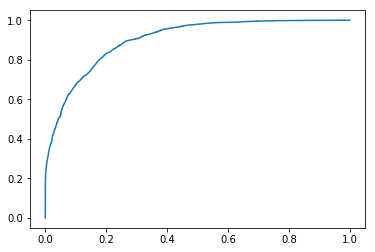

In [106]:
plt.plot(fpr,tpr)

In [107]:
metrics.roc_auc_score(y_test, predict_prob[:,1])

0.90123271275845